<a href="https://colab.research.google.com/github/bakibillahrahat/Stroke-Prediction/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Mount your google drive.



In [1]:
# mount google drive if you are using Colab
# otherewise, leave it blank

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Import necessary libraries.



In [2]:
# load/import all required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import sklearn


•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [3]:
# write task-1 solution

train_path = '/content/drive/MyDrive/Python/train.csv'
test_path = '/content/drive/MyDrive/Python/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train.head()

id  gender age  hypertension  heart_disease ever_married work_type  \
0   1192  Female  31             0              0           No  Govt_job   
1     77  Female  13             0              0           No  children   
2  59200    Male  18             0              0           No   Private   
3  24905  Female  65             0              0          Yes   Private   
4  24257    Male   4             0              0           No  children   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Rural              70.66  27.2     never smoked       0  
1          Rural              85.81  18.6          Unknown       0  
2          Urban              60.56  33.0     never smoked       0  
3          Urban             205.77  46.0  formerly smoked       1  
4          Rural              90.42  16.2          Unknown       0

In [4]:
test.head()

id  gender  age  hypertension  heart_disease ever_married  \
0  47472  Female   58             0              0          Yes   
1  36841    Male   78             1              0          Yes   
2   3135  Female   73             0              0           No   
3  65218    Male    2             0              0           No   
4   1847  Female   20             0              0           No   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  
0        Private          Urban             107.26  38.6  formerly smoked  
1  Self-employed          Rural              56.11  25.5  formerly smoked  
2  Self-employed          Rural              69.35   NaN     never smoked  
3       children          Rural             109.10  20.0          Unknown  
4       Govt_job          Rural              79.53   NaN     never smoked

In [5]:
train.shape

(1137, 12)

In [6]:
test.shape

(932, 11)

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [7]:
# write task-2 solution

train_missing_values=train.isnull().sum()
train_missing_values

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

In [8]:
test_missing_values=test.isnull().sum()
test_missing_values

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  57
smoking_status        0
dtype: int64

In [9]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}' .format(test_data.shape))

train data shape: (1085, 12)
test data shape: (875, 11)


:•	**Task 3:** Draw graphs to analyze the frequency distributions of the
features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

In [10]:
# write task-3 solution

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1137 non-null   int64  
 1   gender             1137 non-null   object 
 2   age                1137 non-null   object 
 3   hypertension       1137 non-null   int64  
 4   heart_disease      1137 non-null   int64  
 5   ever_married       1137 non-null   object 
 6   work_type          1137 non-null   object 
 7   Residence_type     1137 non-null   object 
 8   avg_glucose_level  1137 non-null   float64
 9   bmi                1085 non-null   float64
 10  smoking_status     1137 non-null   object 
 11  stroke             1137 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 106.7+ KB


In [11]:
def histogram(column):
  plt.viridis()
  plt.figure(figsize=(15, 20))

  for index, col in enumerate(column):
    plt.subplot((len(column) + 1) // 2, 2, index + 1)
    plt.hist(train[col],bins=10, color='green',edgecolor='black',density=True,alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.grid(axis='y',linestyle='--', alpha=0.7)

    # Display the plot
  plt.tight_layout(pad = 2)

  plt.show()

<Figure size 640x480 with 0 Axes>

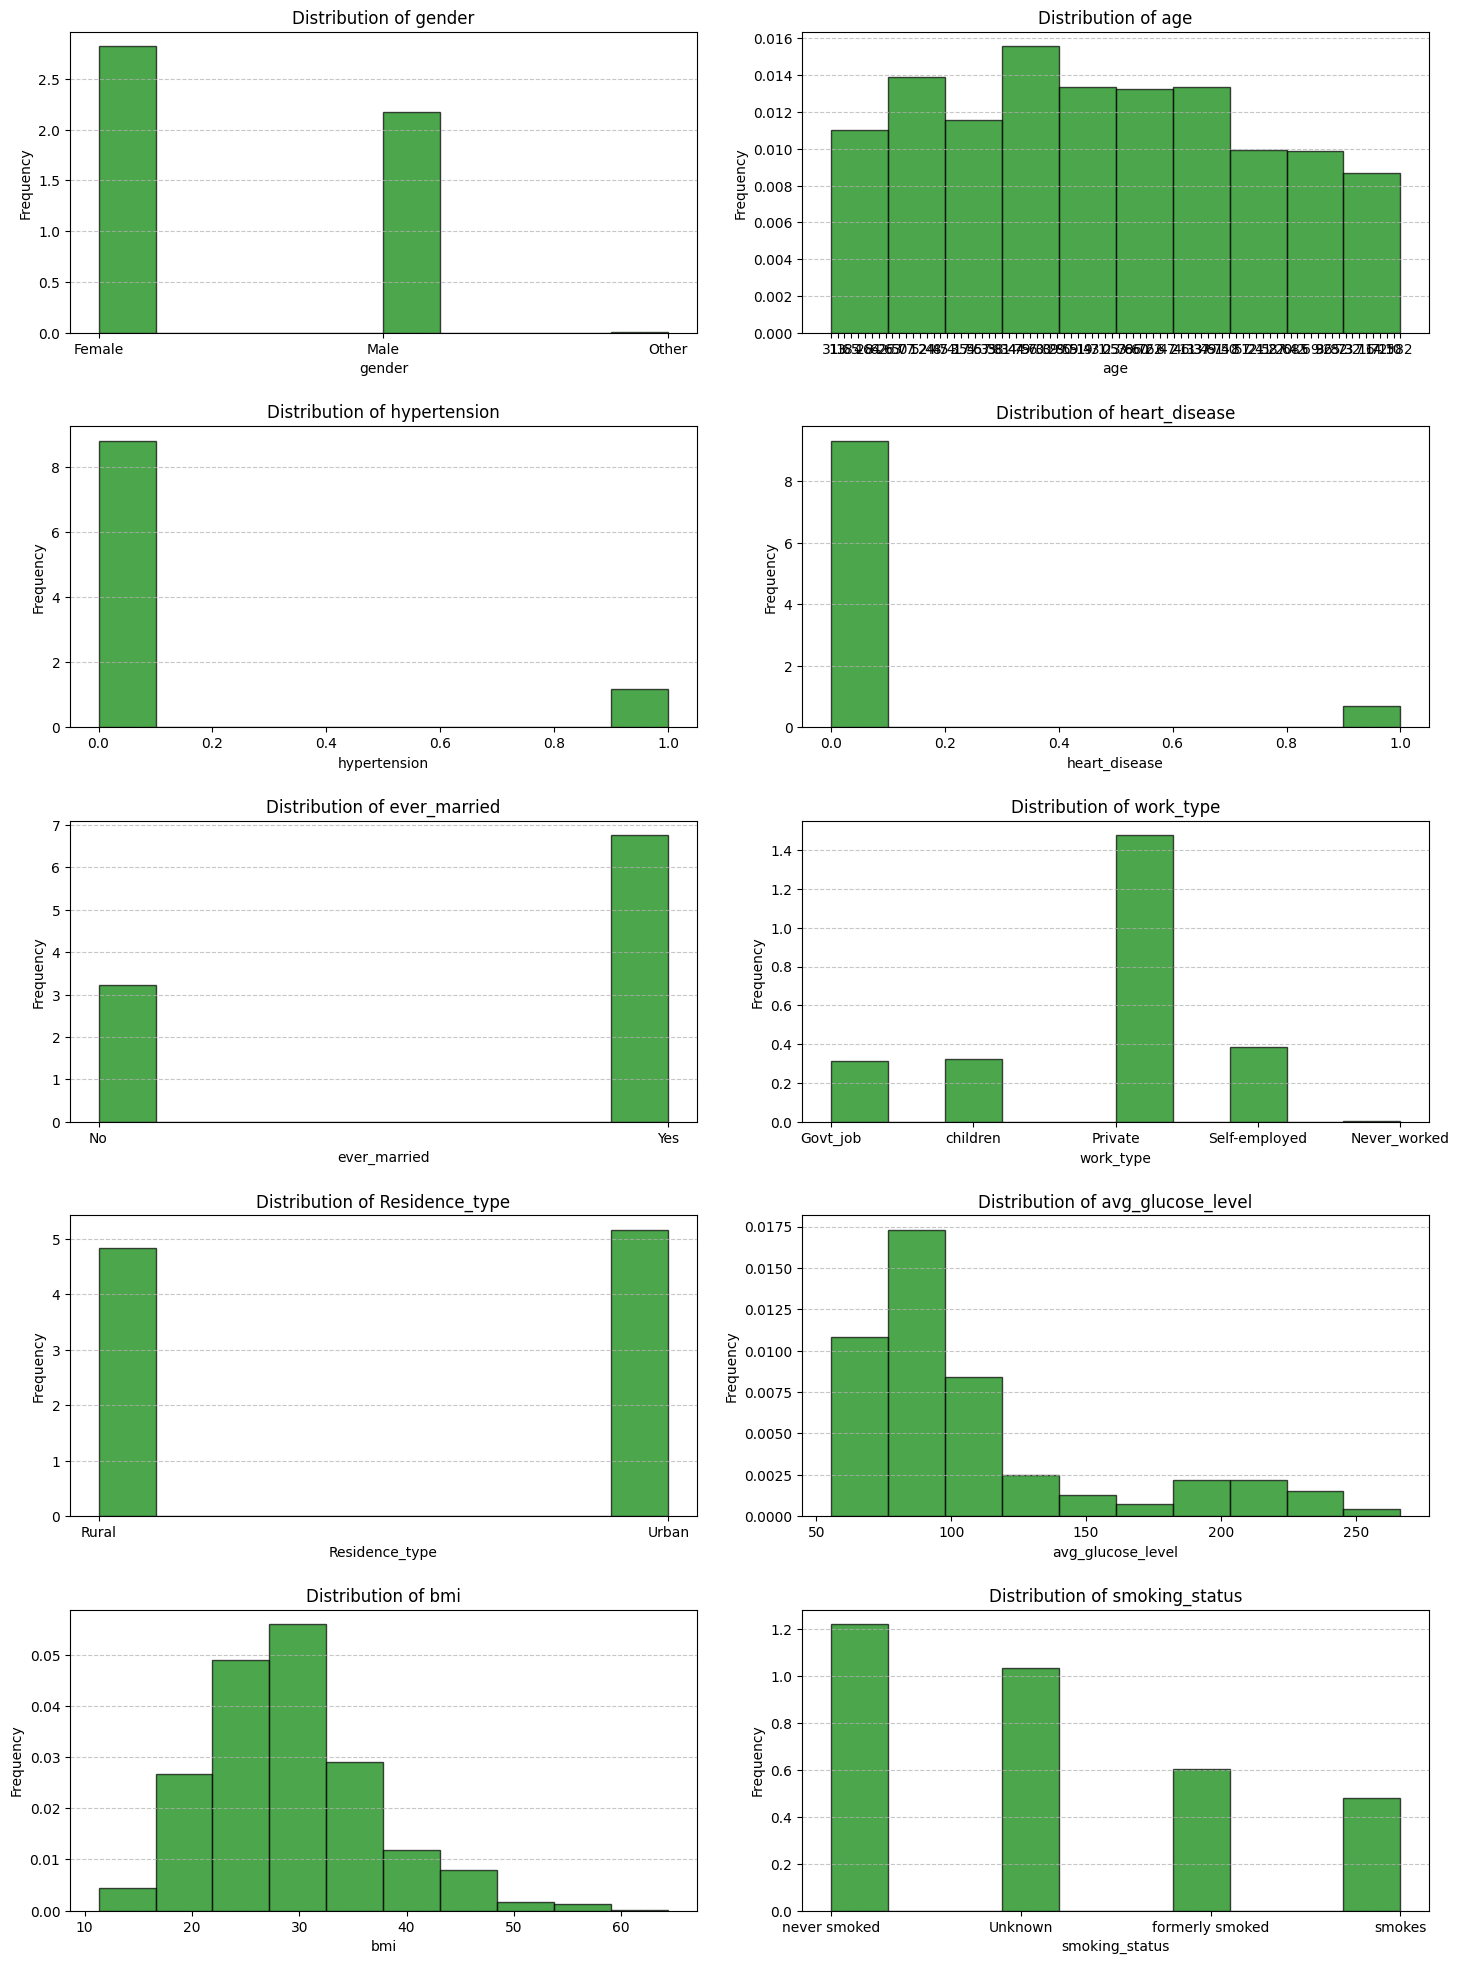

In [36]:
x = train.columns.tolist()[1:-1]
histogram(x)

•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

In [13]:
# write task-4 solution

def price_scatter_plot(x_axis, column_name):

    # 1- set figure size
    plt.figure(figsize=(15, 20))

    # 2- loop over services list to plot columns
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1) # create sub-plot

        # sns.scatterplot(x = x_axis, y = col, data = data)
        plt.scatter(train[x_axis], train[col],alpha=0.5, color='b', edgecolors='k')

        plt.title(f'{col.upper()} vs. STROKE', fontsize=18)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('STROKE', fontsize=14)

        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)

    # 3- set layout between two plots
    plt.tight_layout(pad = 2)

    plt.show()

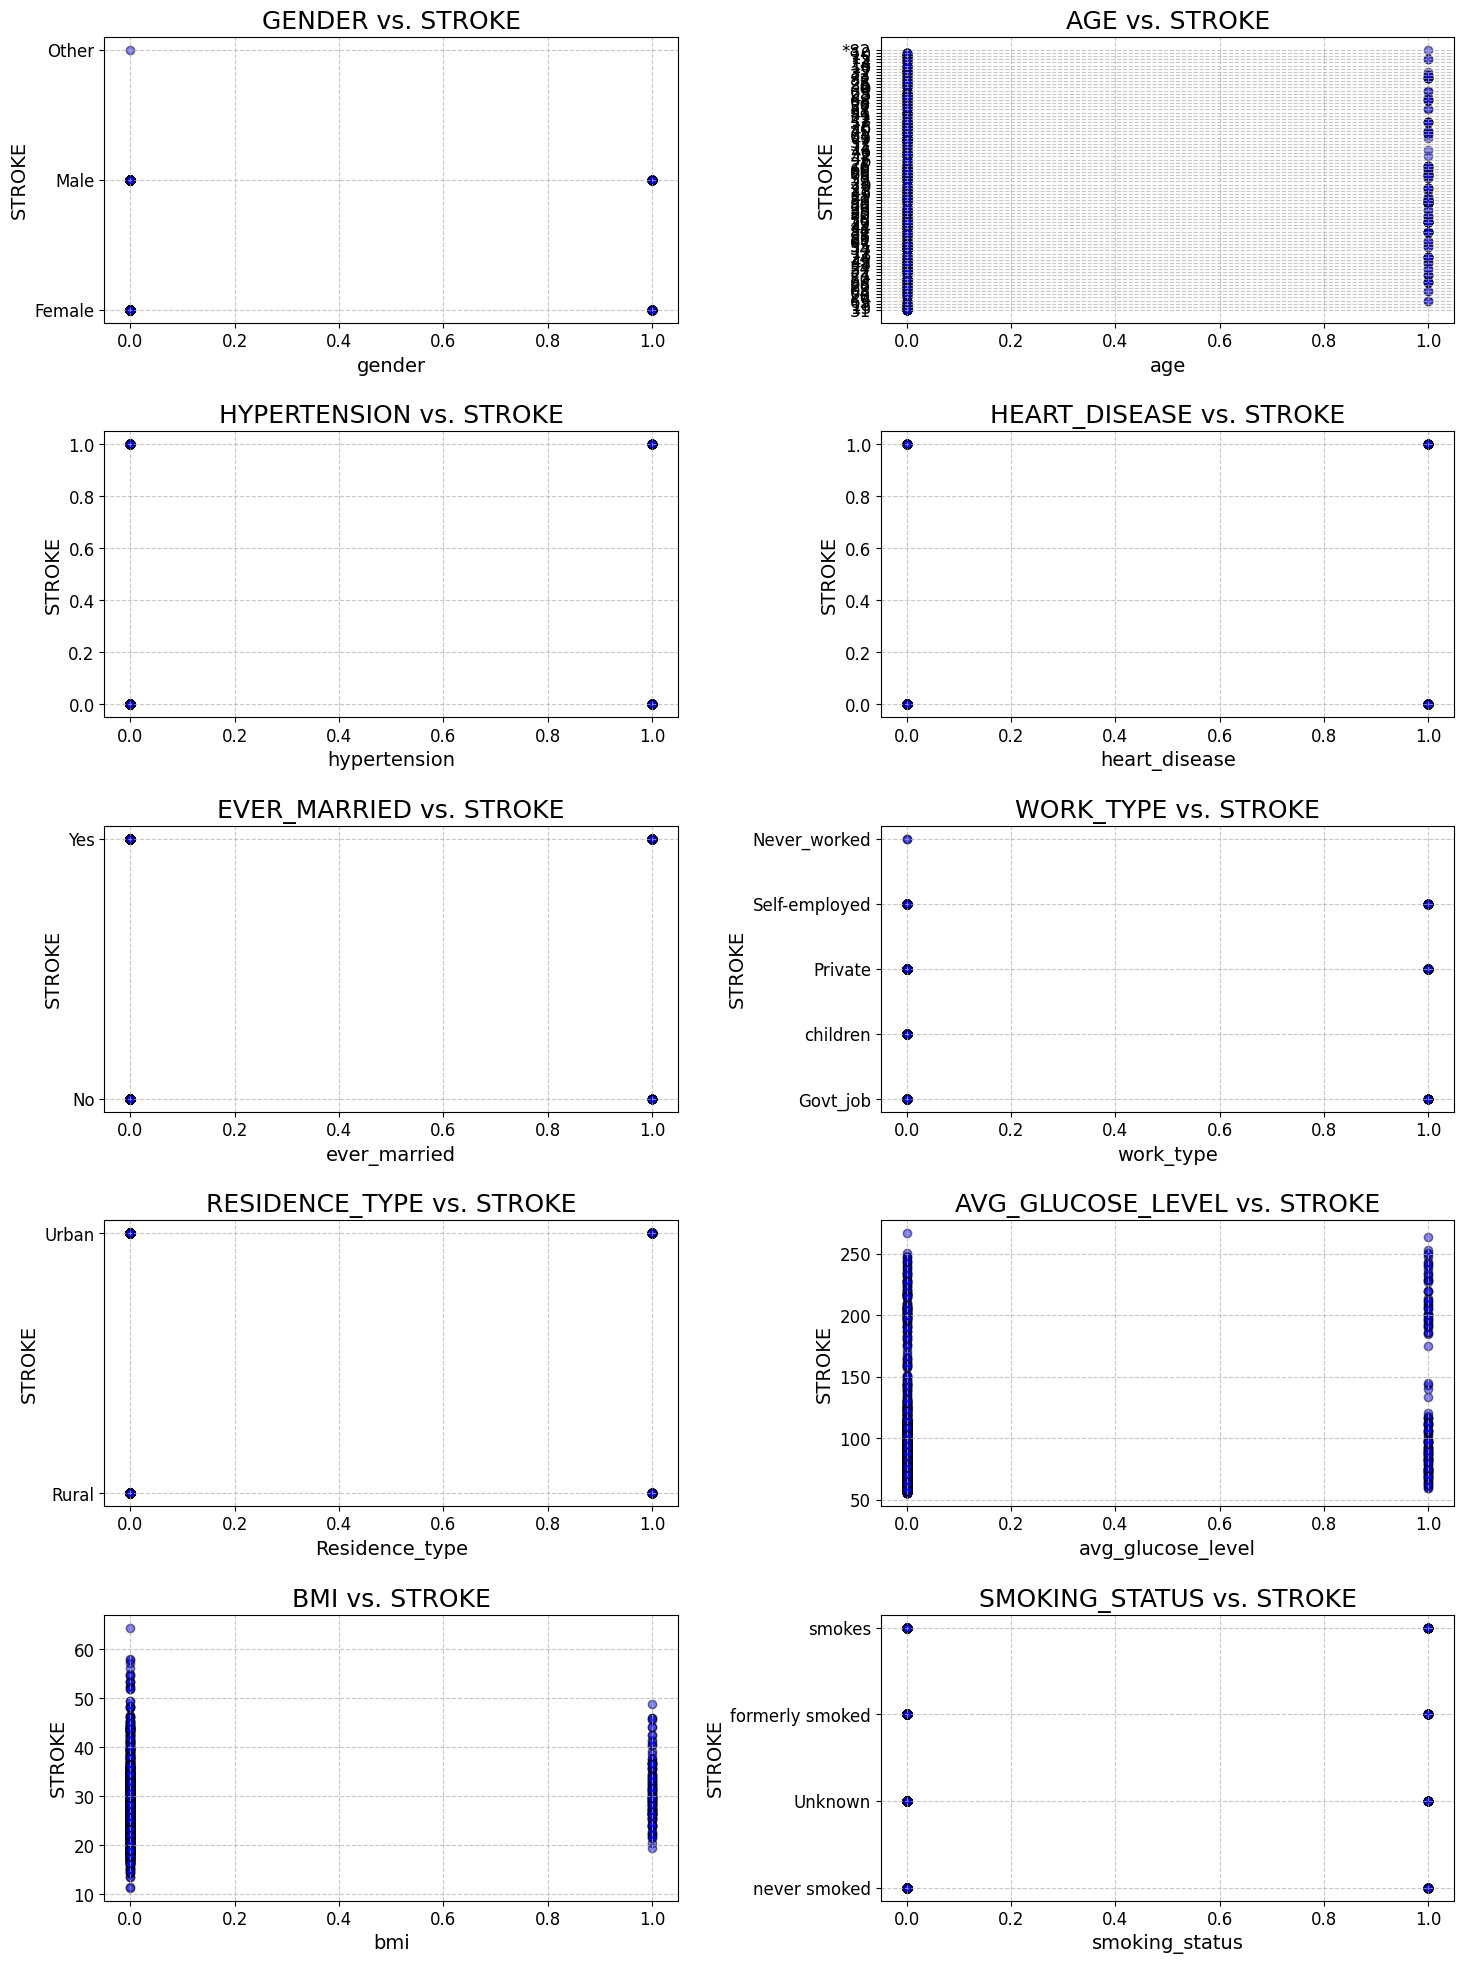

In [34]:
columns = train.columns.to_list()[1:-1]
price_scatter_plot("stroke",columns)

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [15]:
# write task-5 solution

str_data=train_data.select_dtypes(include=['object'])
str_dt=test_data.select_dtypes(include=['object'])

int_data=train_data.select_dtypes(include=['integer', 'float'])
int_dt=test_data.select_dtypes(include=['integer', 'float'])

In [16]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

gender  age  ever_married  work_type  Residence_type  smoking_status  \
0       0   26             0          0               0               2   
1       0    6             0          4               0               0   
2       1   11             0          2               1               2   
3       0   63             1          2               1               1   
4       1   35             0          4               0               0   

      id  hypertension  heart_disease  avg_glucose_level   bmi  stroke  
0   1192             0              0              70.66  27.2       0  
1     77             0              0              85.81  18.6       0  
2  59200             0              0              60.56  33.0       0  
3  24905             0              0             205.77  46.0       1  
4  24257             0              0              90.42  16.2       0

In [17]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

gender  age  ever_married  work_type  Residence_type  smoking_status  \
0       0   26             0          0               0               2   
1       0    6             0          4               0               0   
2       1   11             0          2               1               2   
3       0   63             1          2               1               1   
4       1   35             0          4               0               0   

      id  hypertension  heart_disease  avg_glucose_level   bmi  stroke  
0   1192             0              0              70.66  27.2       0  
1     77             0              0              85.81  18.6       0  
2  59200             0              0              60.56  33.0       0  
3  24905             0              0             205.77  46.0       1  
4  24257             0              0              90.42  16.2       0

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [18]:
# write task-6 solution

xtrain=features.drop(["stroke"],axis=1)
xtrain.shape

(1085, 11)

In [19]:
ytrain=features["stroke"]
ytrain.head()
ytrain.shape

(1085,)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)
x_test.shape


(272, 11)

In [21]:
y_test.shape

(272,)

In [22]:
x_train.head()


gender  age  ever_married  work_type  Residence_type  smoking_status  \
287       1   56             1          3               0               3   
834       0   80             1          2               1               0   
345       0    2             0          4               0               0   
588       1   45             1          2               1               2   
756       1   52             1          2               1               0   

        id  hypertension  heart_disease  avg_glucose_level   bmi  
287  36255             0              0             118.03  35.5  
834  70943             0              0              73.54  24.0  
345  29764             0              0              96.62  18.6  
588  68370             0              0             130.07  26.0  
756  38642             0              0              63.56  29.9

In [23]:
y_train.head()

287    1
834    1
345    0
588    0
756    0
Name: stroke, dtype: int64

In [24]:
x_test.head()

gender  age  ever_married  work_type  Residence_type  smoking_status  \
495       0   29             0          2               0               1   
893       0   10             0          2               1               0   
384       0   77             1          2               0               0   
489       0    6             0          4               1               0   
50        1   70             1          0               0               1   

        id  hypertension  heart_disease  avg_glucose_level   bmi  
495  16535             0              0              90.15  27.9  
893  62923             0              0              87.39  24.6  
384  43872             0              0              56.34  27.5  
489  18996             0              0             105.22  18.4  
50   29546             0              0              99.76  33.4

In [25]:
y_test.head()

495    0
893    0
384    0
489    0
50     0
Name: stroke, dtype: int64

•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [26]:
# write task-7 solution

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [27]:
predict=model.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

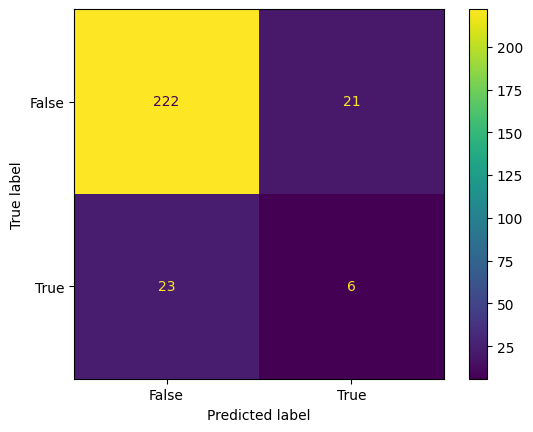

In [28]:
# write task-8 solution
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, recall_score,precision_score,f1_score
confusionMatrix = confusion_matrix(y_test, predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])

cm_display.plot()
plt.show()

•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [29]:
# write task-9 solution

test_score=model.score(x_test, y_test)
print("NBtest_score:", test_score)

NBtest_score: 0.8382352941176471


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score,f1_score
accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict, average='macro')
recall = recall_score(y_test,predict)
f1 = f1_score(y_test, predict, average='macro')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8382352941176471
Precision: 0.564172335600907
Recall: 0.20689655172413793
F1-score: 0.5620608899297423


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [31]:
# write task-10 solution

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=10,scoring='accuracy').mean()
print(f"Cross validation accuracy: {scores}")


Cross validation accuracy: 0.8695121951219512
